In [1]:
## Import the required libraries

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the raw loan data

df = pd.read_csv("loan.csv")

In [3]:
# Check if the data loaded correctly

df.shape

(39717, 111)

In [4]:
df.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
5,1075269,1311441,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
6,1069639,1304742,7000,7000,7000.0,60 months,15.96%,170.08,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
7,1072053,1288686,3000,3000,3000.0,36 months,18.64%,109.43,E,E1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
8,1071795,1306957,5600,5600,5600.0,60 months,21.28%,152.39,F,F2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
9,1071570,1306721,5375,5375,5350.0,60 months,12.69%,121.45,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [5]:
## Lots of columns have null values , dropping the columns which have all null values

df.dropna(axis = 1 , how = 'all' , inplace = True)

In [6]:
df.shape

(39717, 57)

In [7]:
# Check the unique value in the dataset
df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths              

In [8]:
# Noticed that many of the columns have only one unique record - which will not have any significance in data analysis.
# Removing the coulmns which have 1 unique record.

df.drop(["pymnt_plan", "initial_list_status" , "policy_code", "application_type" , "acc_now_delinq", "chargeoff_within_12_mths" , "delinq_amnt", "tax_liens"], axis=1 , inplace = True )

In [9]:
# Check the unique values again

df.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
url                           39717
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
mths_since_last_delinq      

In [10]:
df.shape

(39717, 49)

In [11]:
# Noticed that many of the columns have only all 39717 unique records - which will not have any significance in data analysis.
# Removing the coulmns which have 39717 unique record.

df.drop(["id", "member_id", "url"], axis=1 , inplace = True )

In [12]:
df.shape

(39717, 46)

In [13]:
df.nunique()

loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
desc                          26527
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
mths_since_last_delinq           95
mths_since_last_record          111
open_acc                         40
pub_rec                     

In [15]:
# remove the columns which doesnt have any significance in analysis

df.drop(["zip_code","emp_title","desc","title"], axis=1, inplace= True)

In [16]:
df.shape

(39717, 42)

In [17]:
## check missing values

100*df.isnull().mean()

loan_amnt                      0.000000
funded_amnt                    0.000000
funded_amnt_inv                0.000000
term                           0.000000
int_rate                       0.000000
installment                    0.000000
grade                          0.000000
sub_grade                      0.000000
emp_length                     2.706650
home_ownership                 0.000000
annual_inc                     0.000000
verification_status            0.000000
issue_d                        0.000000
loan_status                    0.000000
purpose                        0.000000
addr_state                     0.000000
dti                            0.000000
delinq_2yrs                    0.000000
earliest_cr_line               0.000000
inq_last_6mths                 0.000000
mths_since_last_delinq        64.662487
mths_since_last_record        92.985372
open_acc                       0.000000
pub_rec                        0.000000
revol_bal                      0.000000


In [19]:
# Records mths_since_last_delinq , mths_since_last_record, next_pymnt_d have more than 50% of missing values. 
# Dropping these columns

df.drop(["mths_since_last_delinq" , "mths_since_last_record", "next_pymnt_d"], axis=1, inplace= True)

In [20]:
df.shape

(39717, 39)

In [21]:
df.nunique()

loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
purpose                          14
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                         40
pub_rec                           5
revol_bal                     21711
revol_util                     1089
total_acc                        82
out_prncp                      1137
out_prncp_inv                  1138
total_pymnt                 

In [22]:
## check for missing values again

100*df.isnull().mean()

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
purpose                       0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
inq_last_6mths                0.000000
open_acc                      0.000000
pub_rec                       0.000000
revol_bal                     0.000000
revol_util                    0.125891
total_acc                     0.000000
out_prncp                

In [25]:
# In emp_length the missing data is 2.7%. Checking the mode of the values.

print("Mode : " + df.emp_length.mode()[0])
df.emp_length.value_counts()

Mode : 10+ years


10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: emp_length, dtype: int64

In [26]:
## Filling the misisng data in emp_length with mode

df.emp_length.fillna(df.emp_length.mode()[0], inplace = True)

In [27]:
## check for missing values again

100*df.isnull().mean()

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_length                    0.000000
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
purpose                       0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
inq_last_6mths                0.000000
open_acc                      0.000000
pub_rec                       0.000000
revol_bal                     0.000000
revol_util                    0.125891
total_acc                     0.000000
out_prncp                

In [28]:
## In revol_util 0.12 % of entries are NA. deleting these rows as these are very small and will not impact the anlaysis
df.dropna(subset=['revol_util'], inplace=True)

In [29]:
100*df.isnull().mean()

loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_length                    0.000000
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
purpose                       0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line              0.000000
inq_last_6mths                0.000000
open_acc                      0.000000
pub_rec                       0.000000
revol_bal                     0.000000
revol_util                    0.000000
total_acc                     0.000000
out_prncp                

In [31]:
# Removing NA entries from last_pymnt_d, last_credit_pull_d & pub_rec_bankruptcies
df.dropna(subset=['last_pymnt_d'], inplace=True)

In [32]:
df.dropna(subset=['last_credit_pull_d'], inplace=True)
df.dropna(subset=['collections_12_mths_ex_med'], inplace=True)

In [33]:
df.dropna(subset=['pub_rec_bankruptcies'], inplace=True)

In [34]:
100*df.isnull().mean()

loan_amnt                     0.0
funded_amnt                   0.0
funded_amnt_inv               0.0
term                          0.0
int_rate                      0.0
installment                   0.0
grade                         0.0
sub_grade                     0.0
emp_length                    0.0
home_ownership                0.0
annual_inc                    0.0
verification_status           0.0
issue_d                       0.0
loan_status                   0.0
purpose                       0.0
addr_state                    0.0
dti                           0.0
delinq_2yrs                   0.0
earliest_cr_line              0.0
inq_last_6mths                0.0
open_acc                      0.0
pub_rec                       0.0
revol_bal                     0.0
revol_util                    0.0
total_acc                     0.0
out_prncp                     0.0
out_prncp_inv                 0.0
total_pymnt                   0.0
total_pymnt_inv               0.0
total_rec_prnc

In [35]:
## Categorising the data between Numerical and Categorical columns

num_columns=['last_pymnt_d', 'revol_util', 'last_credit_pull_d', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'annual_inc', 'issue_d', 'addr_state', 'dti', 'earliest_cr_line', 'revol_bal', 'total_acc', 'out_prncp', 'out_prncp_inv', 'total_rec_prncp', 'total_rec_late_fee', 'recoveries']
cat_columns=['emp_length', 'pub_rec_bankruptcies', 'term', 'grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec']

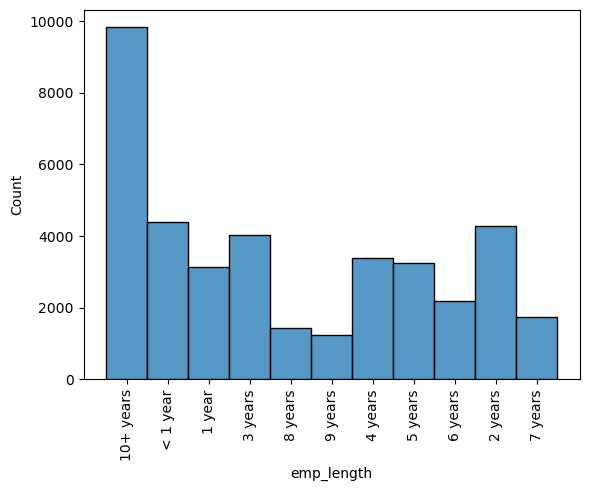

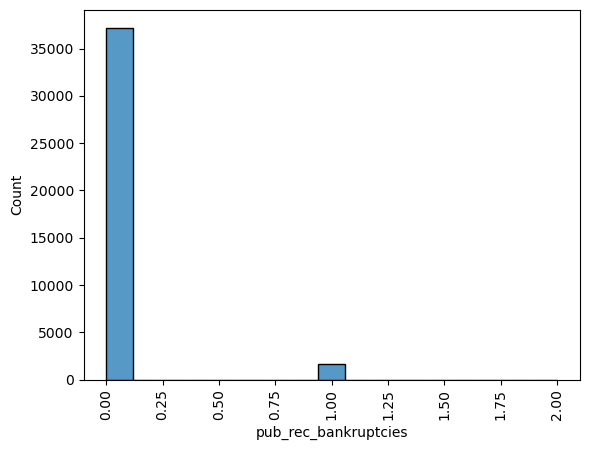

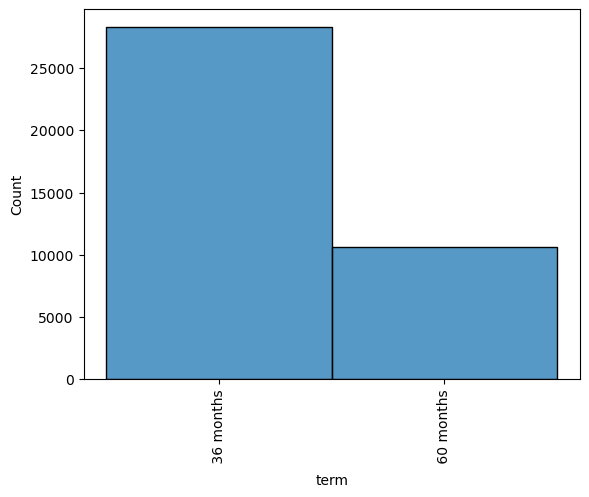

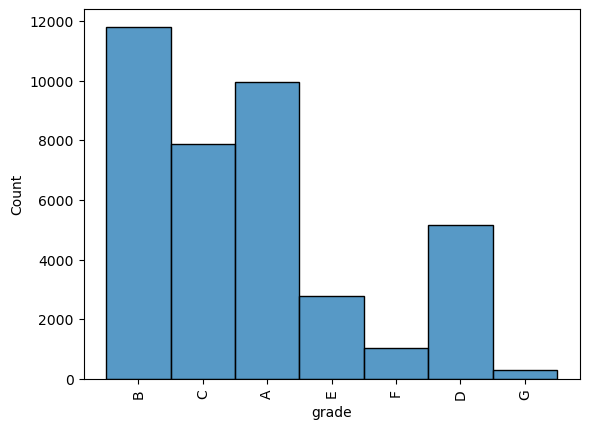

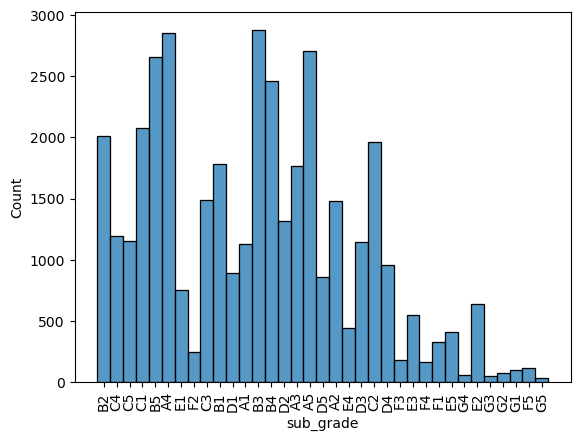

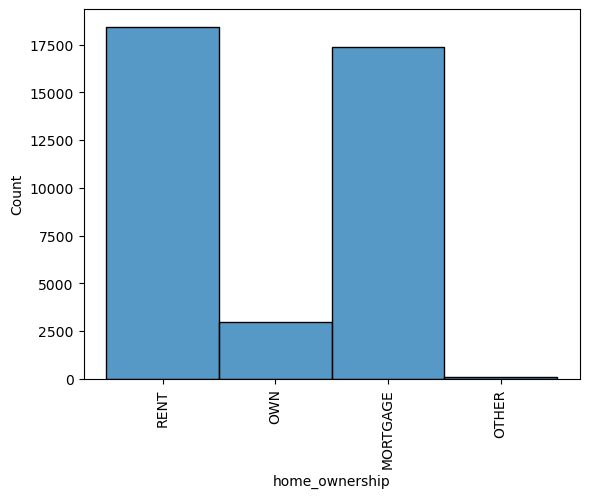

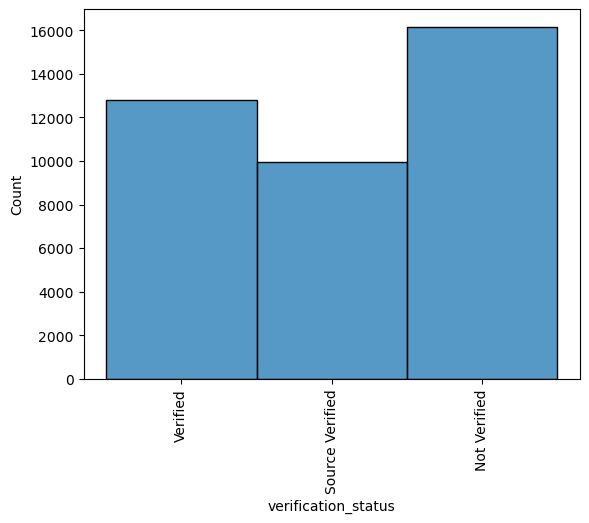

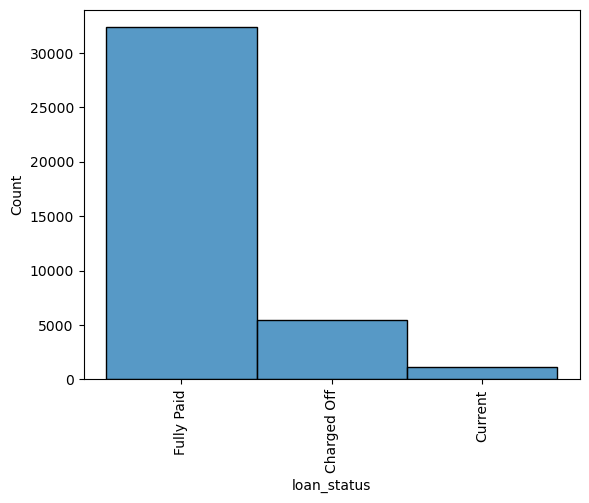

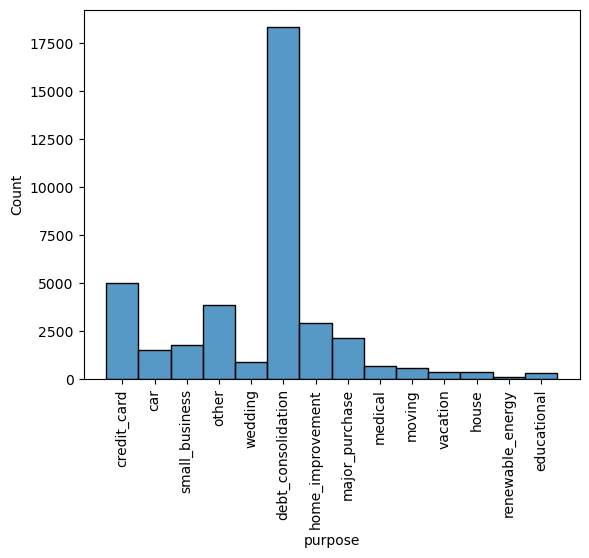

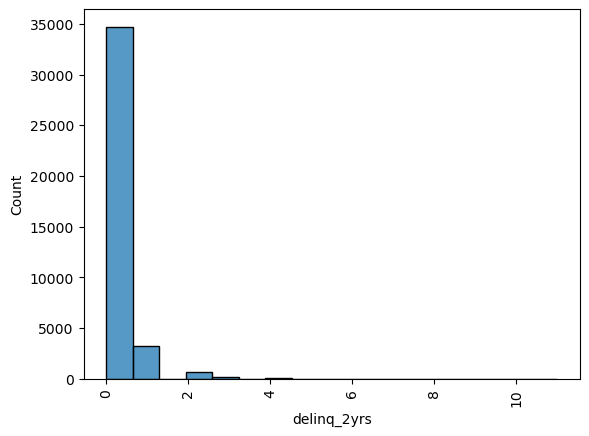

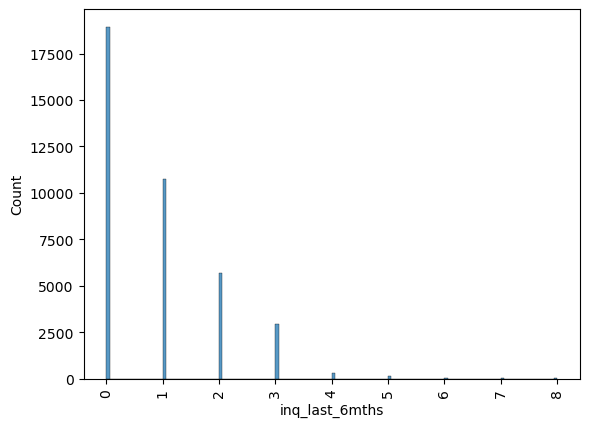

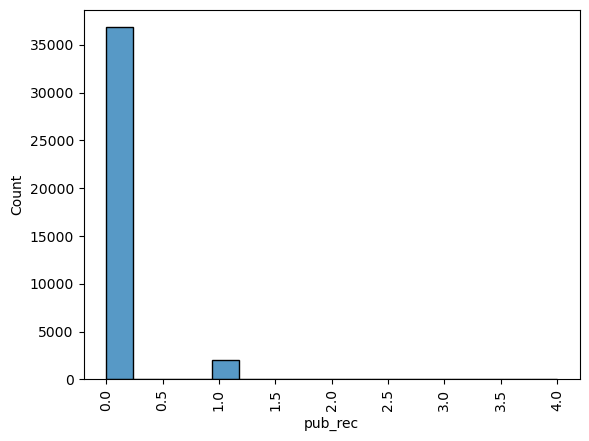

In [36]:
for col in cat_columns:
    sns.histplot(x=df[col])
    plt.xticks(rotation=90)
    plt.show()   

In [37]:
## As per the above income we have outoliers . hence removing the outliers 

quantile_info = df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
print(quantile_info)

0.50     59319.00
0.75     82500.00
0.90    116000.00
0.95    142000.00
0.97    165000.00
0.98    186482.40
0.99    234603.96
Name: annual_inc, dtype: float64


In [38]:
annual_inc_95 = df['annual_inc'].quantile(0.95)
df = df[df.annual_inc <= annual_inc_95]

<Axes: xlabel='annual_inc', ylabel='Count'>

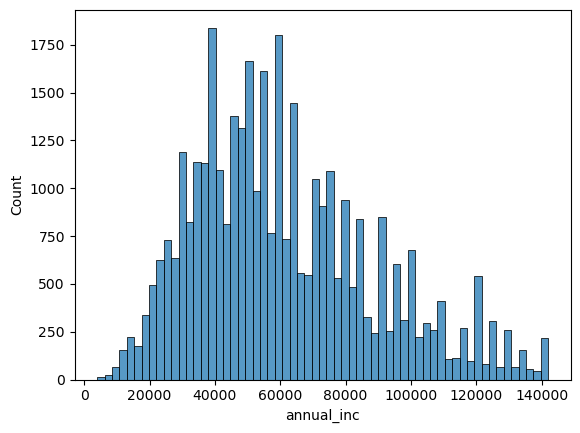

In [40]:
sns.histplot(df.annual_inc)

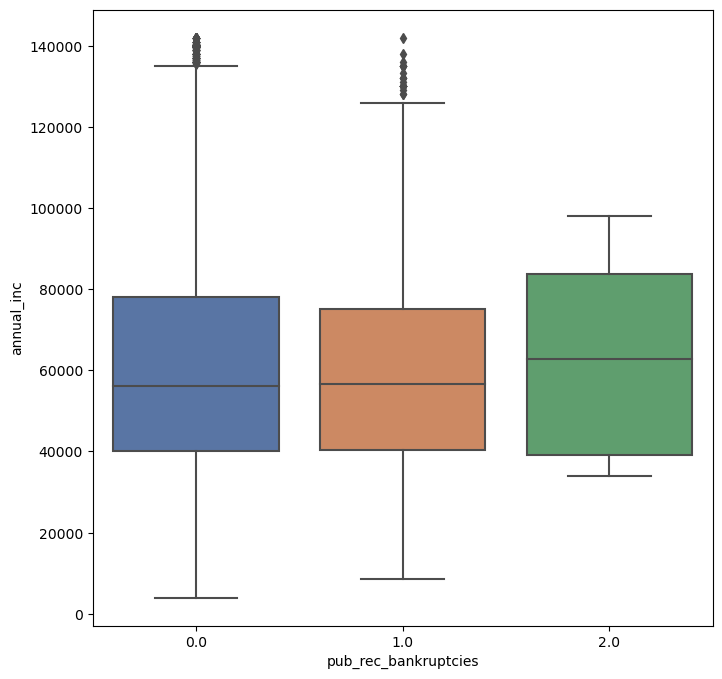

In [43]:
## Bivariate Analysis

plt.figure(figsize=(8,8))
sns.boxplot(data =df,x='pub_rec_bankruptcies',y = 'annual_inc',palette="deep")
plt.show()

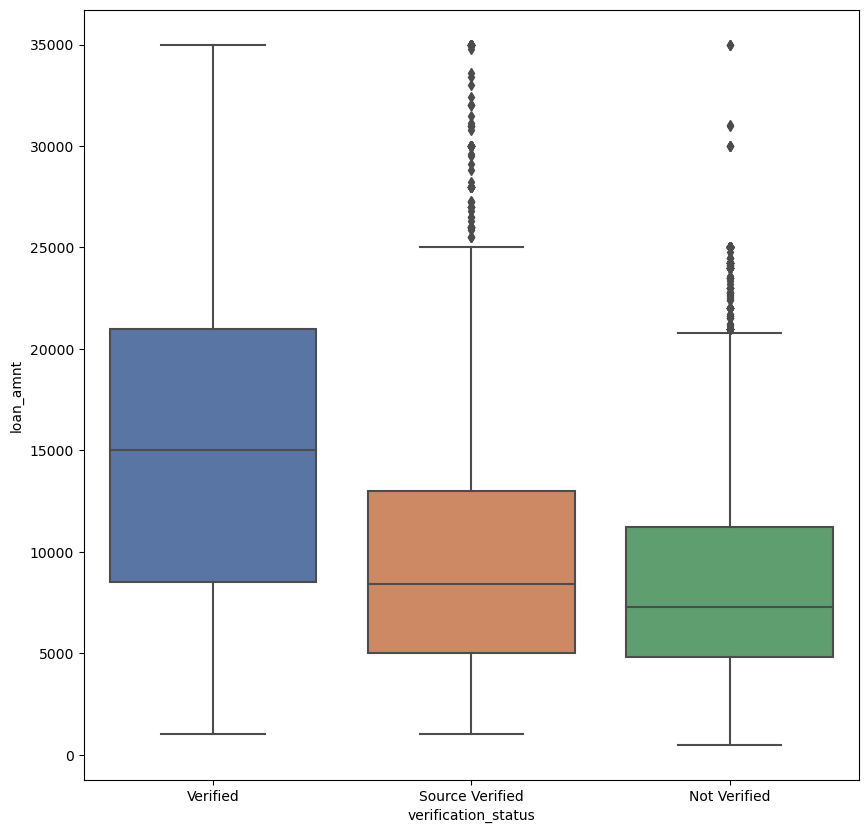

In [45]:
plt.figure(figsize=(10,10))
sns.boxplot(data =df,x='verification_status',y = 'loan_amnt',palette="deep")
plt.show()

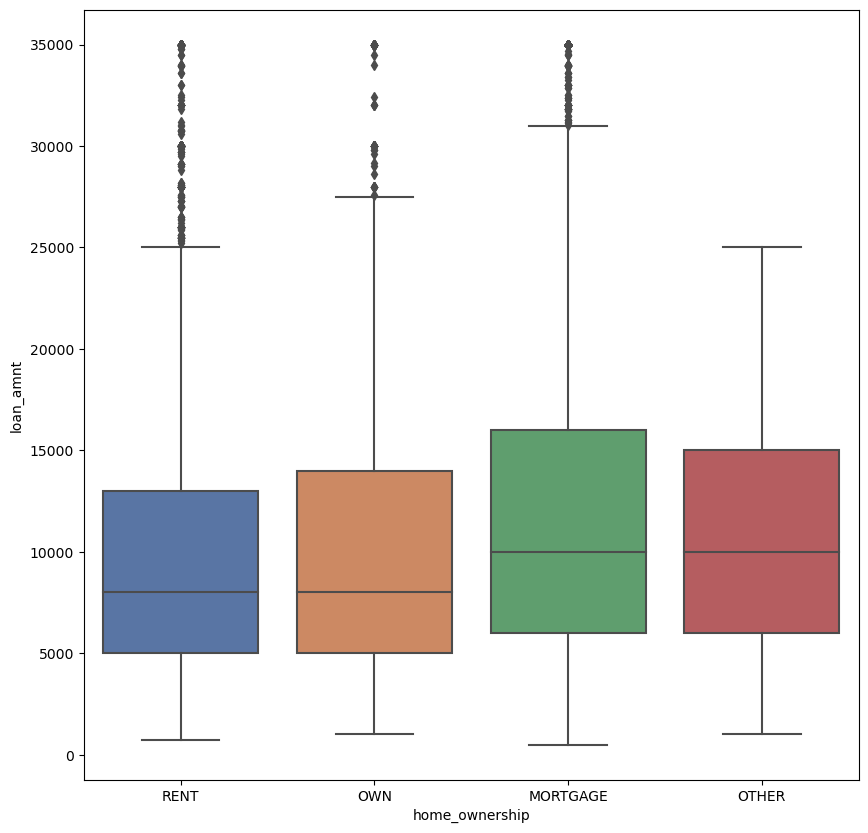

In [46]:
plt.figure(figsize=(10,10))
sns.boxplot(data =df,x='home_ownership',y = 'loan_amnt',palette="deep")
plt.show()

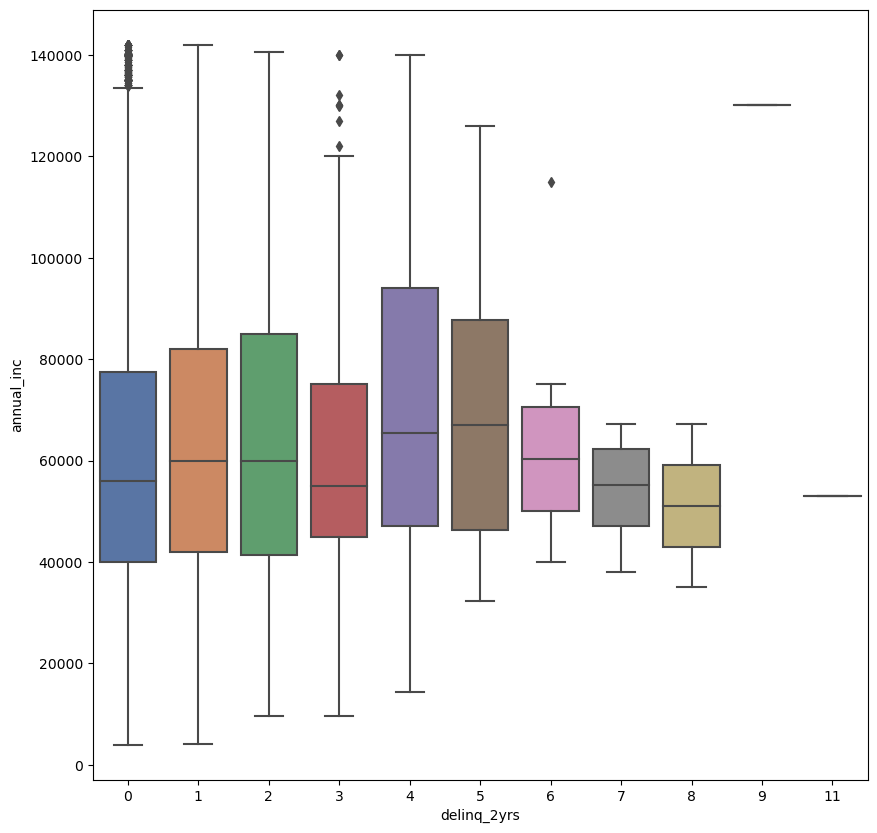

In [49]:
plt.figure(figsize=(10,10))
sns.boxplot(data =df,x='delinq_2yrs',y = 'annual_inc',palette="deep")
plt.show()

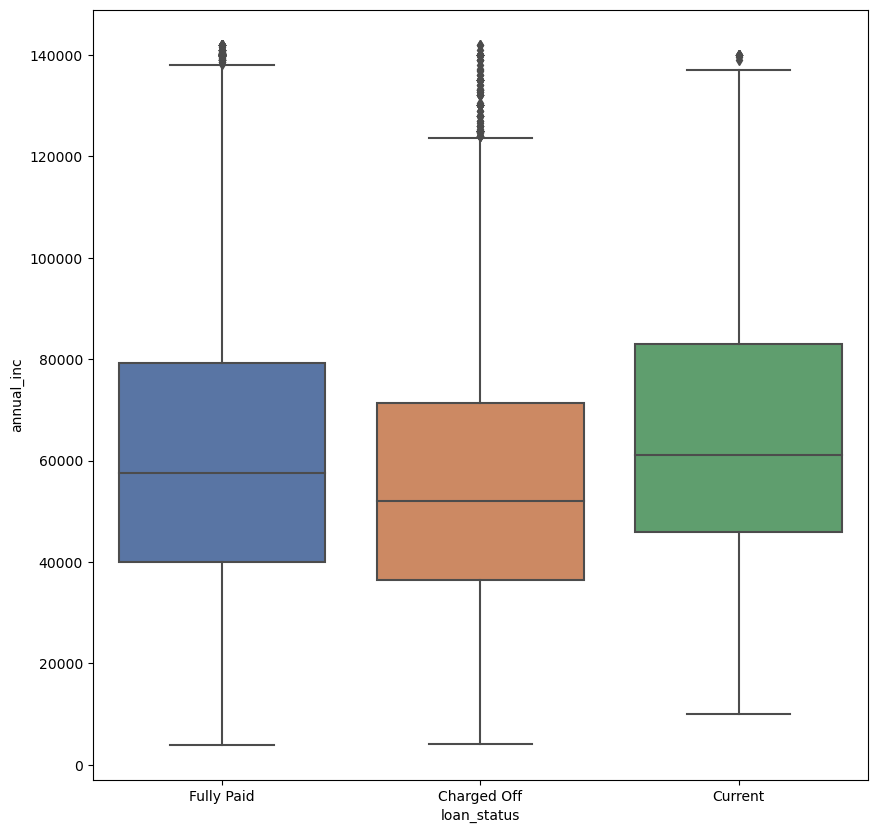

In [50]:
plt.figure(figsize=(10,10))
sns.boxplot(data =df,x='loan_status',y = 'annual_inc',palette="deep")
plt.show()

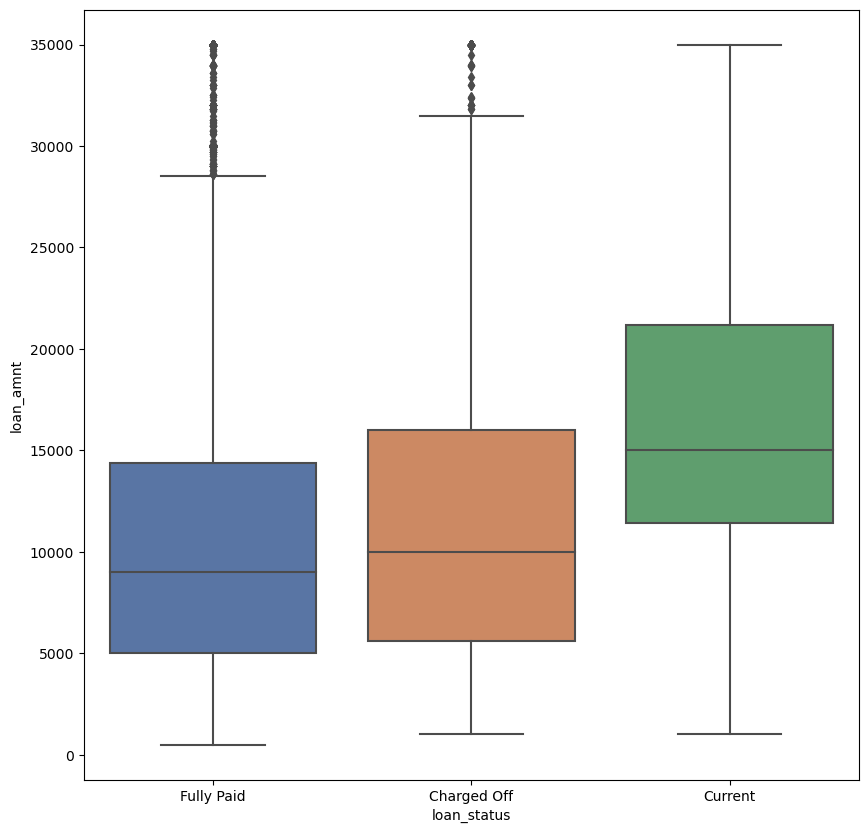

In [53]:
plt.figure(figsize=(10,10))
sns.boxplot(data =df,x='loan_status',y = 'loan_amnt',palette="deep")
plt.show()

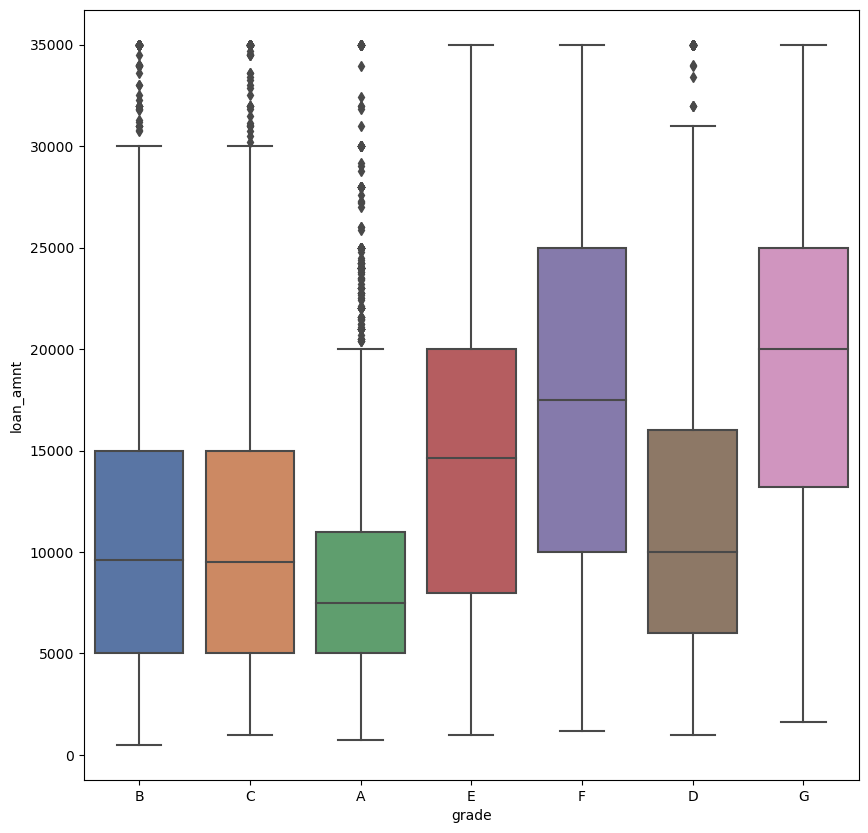

In [59]:
plt.figure(figsize=(10,10))
sns.boxplot(data =df,x='grade',y ='loan_amnt',palette="deep")
plt.show()

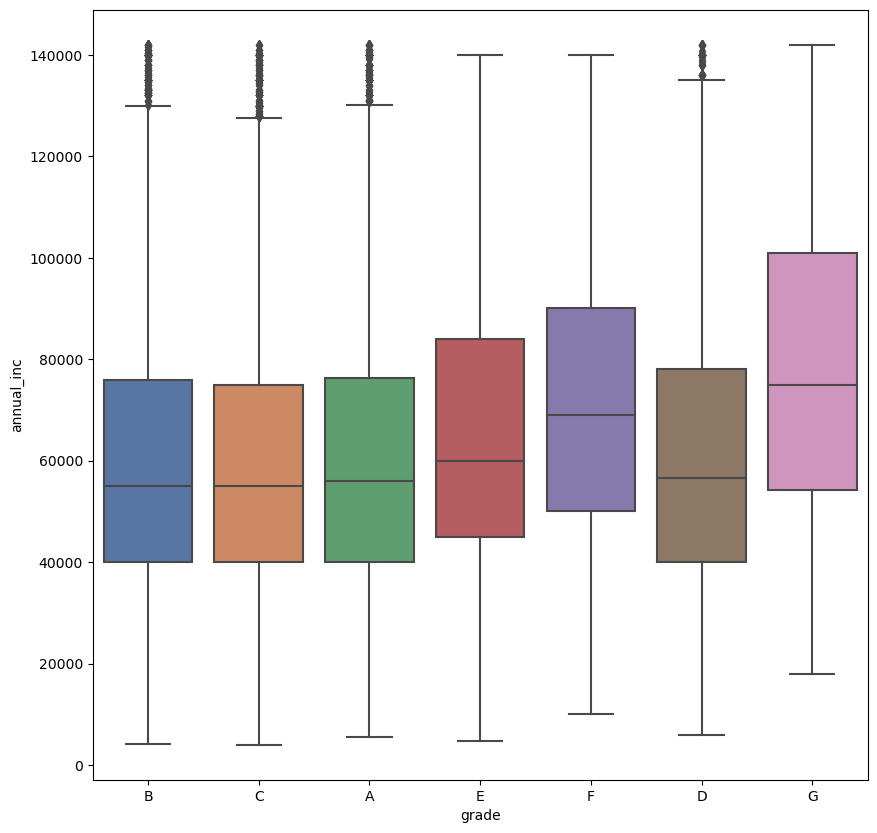

In [60]:
plt.figure(figsize=(10,10))
sns.boxplot(data =df,x='grade',y ='annual_inc',palette="deep")
plt.show()